## 0. Install and Import Dependencies

In [2]:
# !pip install easyocr
# !pip install imutils
# !pip install voila
# !pip install widgetsnbextension
# !pip install fileupload
#!pip install opencv-python==4.5.4.60
#!pip install flask
#!pip install markupsafe==2.0.1


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import ipywidgets as widgets
#from ipywidgets import interact
#from IPython.display import display, clear_output

## 1. Read in Image, Grayscale and Blur

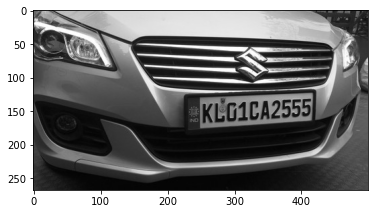

In [4]:
# matplotlib interprets images in RGB format, but OpenCV uses BGR format
# so to convert the image so that it's properly loaded, convert it before loading
img = cv2.imread("Upload/Cars0.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

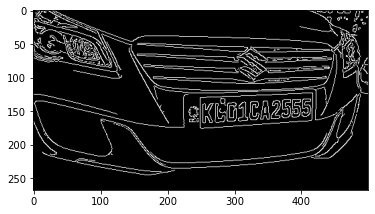

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

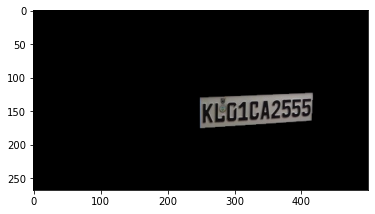

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

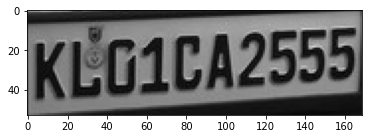

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.5244985964854458)]

## 5. Render Result

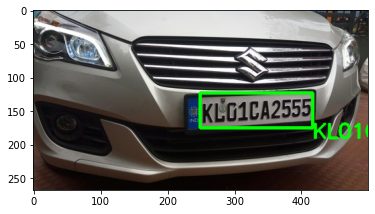

In [32]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
# plt.savefig('Result/a.png')
# plt.show()
#cv2.imshow("test",cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

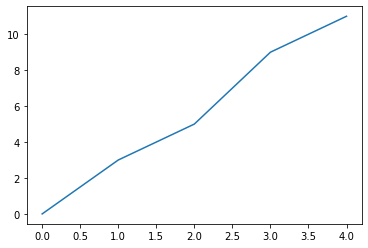

In [33]:
plt.plot([0, 1, 2, 3, 4], [0, 3, 5, 9, 11])

plt.savefig('Result/b.png')







## 6. Render HTML Web

In [16]:
# from ipywidgets import FileUpload
#
#
# def on_upload_change(change):
#     if not change.new:
#         return
#
#     up = change.owner
#     for filename,data in up.value.items():
#         print(f'writing [{filename}] to ./upload/')
#         with open(filename, 'wb') as f:
#             f.write(data['content'])
#     #fileName
#         name = filename
#         print(name)
#         text_fileName = widgets.HTML(value=f" {name}")
#     #displayImages
#     file = open(name, "rb")
#     image = file.read()
#     displayImages = widgets.Image(
#         value=image,
#         format='png',
#         width=300,
#         height=400,
#     )
#     up.value.clear()
#     up._counter = 0
#
#
#
#
# upload_btn = FileUpload()
# upload_btn.observe(on_upload_change, names='_counter')


In [17]:
# text_header = widgets.HTML(value="<h1>ANPR ASSIGNMENT</h1>")
# text_headerline = widgets.HBox([text_header])
# text_upload = widgets.HBox([upload_btn,text_fileName])
# page = widgets.VBox([text_headerline,text_upload,displayImages])
# display(page)